In [1]:
# importing required modules 
import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [8]:
# Loading the required data
fdf = pd.read_csv('Fraud_check.csv')

In [9]:
fdf.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [10]:
fdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [11]:
# creating risk column based on taxable income value 
fdf['risk']=fdf['Taxable.Income']
fdf.loc[fdf['risk']<30000, 'risk'] = 1
fdf.loc[fdf['risk']>30000, 'risk'] = 0

In [12]:
# dropping the city population column has no affect on oucome
# hence dropping the column
fdf = fdf.drop(['City.Population'], axis = 1)
fdf.head()

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban,risk
0,NO,Single,68833,10,YES,0
1,YES,Divorced,33700,18,YES,0
2,NO,Married,36925,30,YES,0
3,YES,Single,50190,15,YES,0
4,NO,Married,81002,28,NO,0


In [13]:
# labeling the data 
label_encoder = preprocessing.LabelEncoder()

fdf['Undergrad']= label_encoder.fit_transform(fdf['Undergrad']) 
fdf['Marital.Status']= label_encoder.fit_transform(fdf['Marital.Status'])
fdf['Urban']= label_encoder.fit_transform(fdf['Urban'])

fdf.head()


,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban,risk
0,0,2,68833,10,1,0
1,1,0,33700,18,1,0
2,0,1,36925,30,1,0
3,1,2,50190,15,1,0
4,0,1,81002,28,0,0


In [14]:
colnames = list(fdf.columns)
colnames

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'Work.Experience',
 'Urban',
 'risk']

In [15]:
# assigning the data to x and y variables
x=fdf.iloc[:,0:5]
y=fdf['risk']

In [16]:
# Splitting data into training and testing data set
X_train, X_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=7)

### Building Decision Tree Classifier  

In [17]:
# Buildong Clasifier 
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

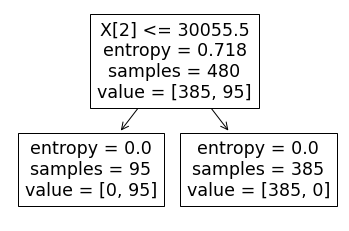

In [18]:
#PLot the decision tree
tree.plot_tree(model);


In [19]:
# the classifier devidedthe data clearly as the out put column directly associated with Taxable income column

In [21]:
#Predicting on test data
preds = model.predict(X_test) # predicting on test data set 

In [22]:
preds

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0], dtype=int64)

In [23]:
# getting the cross table to understand the correct and wrong prediction
pd.crosstab(y_test,preds) 

col_0,0,1
risk,,
0,91,0
1,0,29


In [131]:
# the accuracy is  one for the obvious reason
# now we will drop Taxable income column and see what happends 
np.mean(preds==y_test)

1.0

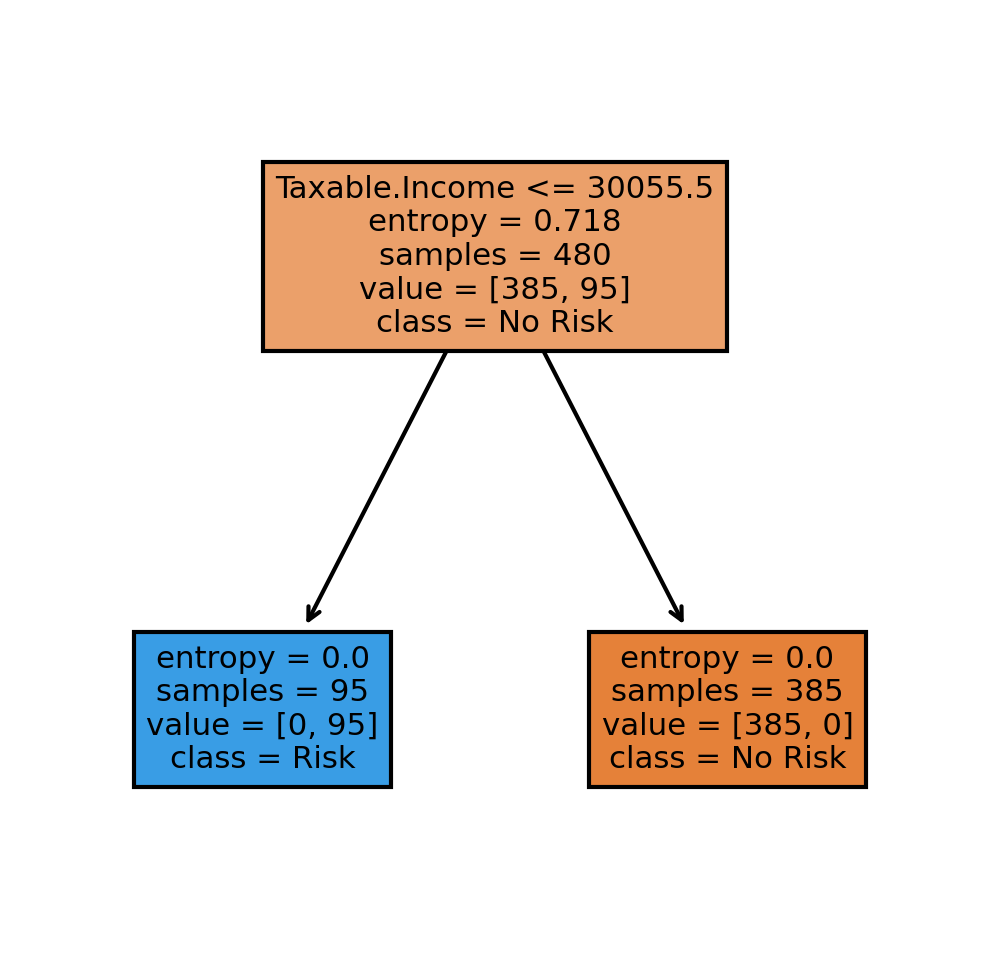

In [24]:
fn=['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'Work.Experience',
 'Urban',
 'risk']
cn=['No Risk','Risk']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

### Building Decision Tree Classifier by droping Taxable income column

In [25]:
# Droping the column and saving the data to fdf2
fdf2 = fdf.drop(['Taxable.Income'], axis = 1)

In [26]:
#assigning x and y variable
x=fdf2.iloc[:,0:4]
y=fdf2['risk']

In [27]:
# Splitting data into training and testing data set
X_train, X_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=7)

In [28]:
# fitting the model with train data
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

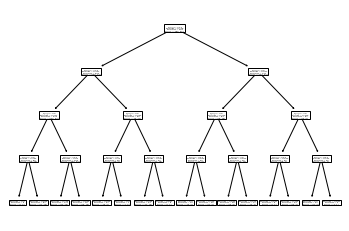

In [29]:
#PLot the decision tree
tree.plot_tree(model);

In [30]:
#Predicting on test data
preds = model.predict(X_test)
# getting the count of each category 
pd.Series(preds).value_counts() 

0    116
1      4
dtype: int64

In [31]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [32]:
# cross ploting the result counts
pd.crosstab(y_test,preds) 

col_0,0,1
risk,,
0,88,3
1,28,1


In [33]:
# Accuracy is as follows
np.mean(preds==y_test)

0.7416666666666667

In [ ]:
# the values are finalised after many iterations
# now checking the same with gini criteria

### Building Decision Tree Classifier using Gini Criteria

In [45]:
model = DecisionTreeClassifier(criterion = 'gini', max_depth=4)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

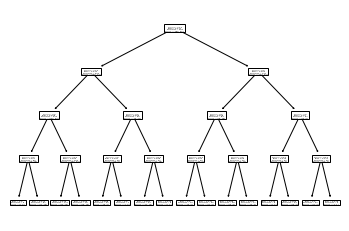

In [46]:
#PLot the decision tree
tree.plot_tree(model);


In [47]:
#Predicting on test data
preds = model.predict(X_test) 
pd.Series(preds).value_counts()

0    116
1      4
dtype: int64

In [48]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [49]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
risk,,
0,88,3
1,28,1


In [50]:
# Accuracy 
np.mean(preds==y_test)

0.7416666666666667

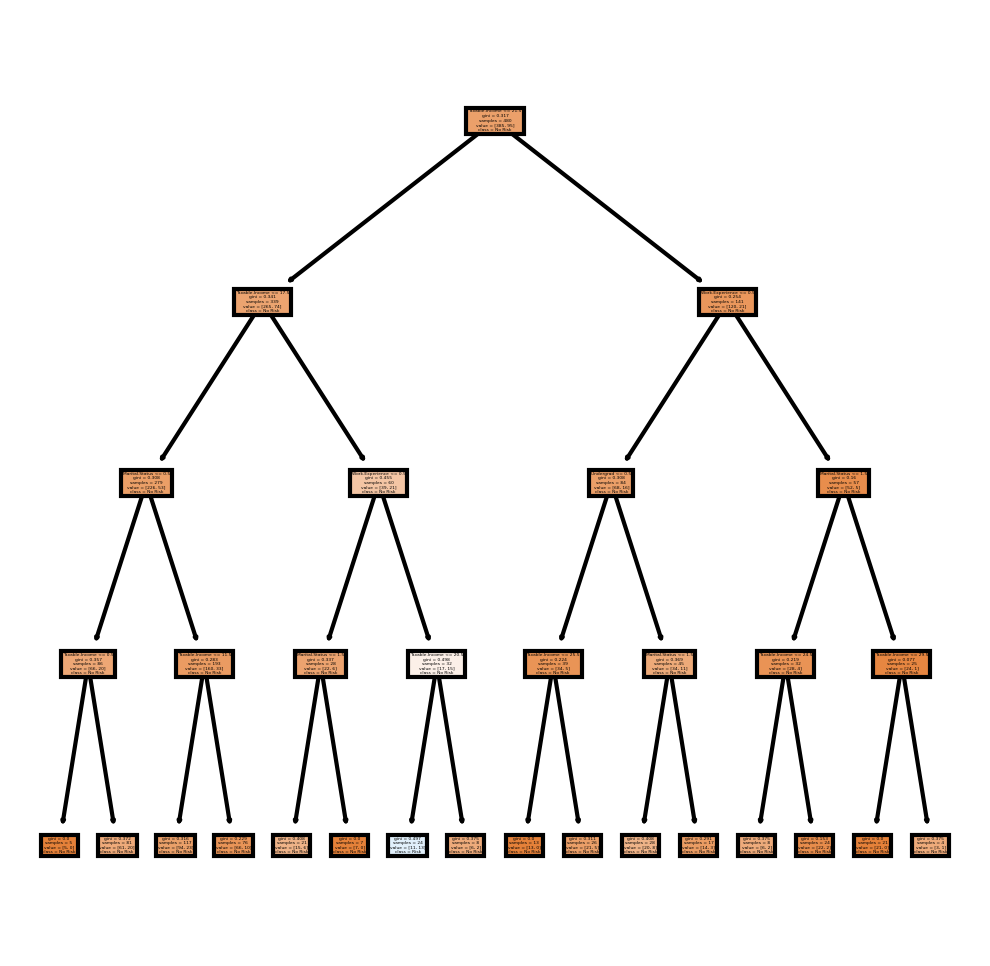

In [51]:
# ploting the tree
fn=['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'Work.Experience',
 'Urban',
 'risk']
cn=['No Risk','Risk']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [ ]:
# ---X---